In [24]:
from pymongo import MongoClient
from bson import ObjectId
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

# MongoDB setup
client = MongoClient("mongodb://localhost:27017")
db = client["lifesnaps"]
collection = db["fitbit"]


In [25]:
user_id = ObjectId("621e2f9167b776a240011ccb")

query = {
    "id": user_id,
    "type": "Daily Heart Rate Variability Summary"
}

In [26]:
cursor = collection.find(query).sort("data.timestamp", 1)
docs = list(cursor)
print(f"Aantal documenten gevonden: {len(docs)}")

dates = []
rmssd_values = []
entropy_values = []

for doc in docs:
    data = doc.get("data", {})
    timestamp = data.get("timestamp")
    rmssd = data.get("rmssd")
    entropy = data.get("entropy")
    
    if isinstance(timestamp, str):
        timestamp = datetime.fromisoformat(timestamp)
    
    if timestamp and rmssd is not None and entropy is not None:
        dates.append(timestamp)
        rmssd_values.append(rmssd)
        entropy_values.append(entropy)

# Print enkele waarden om te checken
for i in range(min(5, len(dates))):
    print(f"{i+1}: Date={dates[i]}, RMSSD={rmssd_values[i]}, Entropy={entropy_values[i]}")


Aantal documenten gevonden: 87
1: Date=2021-10-24 00:00:00, RMSSD=28.4, Entropy=2.286
2: Date=2021-10-25 00:00:00, RMSSD=23.568, Entropy=2.109
3: Date=2021-10-26 00:00:00, RMSSD=17.974, Entropy=2.278
4: Date=2021-10-27 00:00:00, RMSSD=19.41, Entropy=2.613
5: Date=2021-10-28 00:00:00, RMSSD=19.028, Entropy=2.443


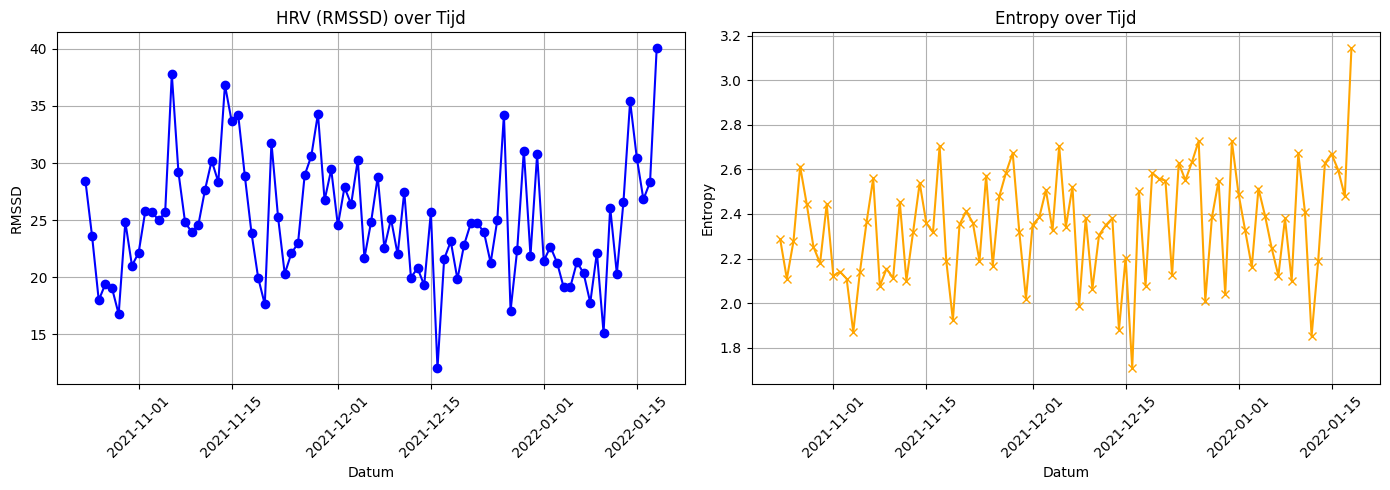

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), sharex=True)

# Plot HRV (RMSSD)
ax1.plot(dates, rmssd_values, marker='o', color='blue')
ax1.set_title("HRV (RMSSD) over Tijd")
ax1.set_xlabel("Datum")
ax1.set_ylabel("RMSSD")
ax1.grid(True)
ax1.tick_params(axis='x', rotation=45)

# Plot Entropy
ax2.plot(dates, entropy_values, marker='x', color='orange')
ax2.set_title("Entropy over Tijd")
ax2.set_xlabel("Datum")
ax2.set_ylabel("Entropy")
ax2.grid(True)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [29]:
uitleg = """
Hartslagvariabiliteit (HRV) is de variatie in tijd tussen opeenvolgende hartslagen. 
Het is een belangrijke indicator van de activiteit en balans van het autonome zenuwstelsel. 
Een hogere HRV betekent dat je lichaam beter kan reageren op stress en veranderingen, en wordt vaak geassocieerd met een goede gezondheid en herstel.

Entropie is een maat voor de complexiteit en onvoorspelbaarheid van je hartslagpatroon. 
Een hoge entropie betekent dat je hartslag meer variatie en complexiteit heeft, wat meestal wijst op een gezond en veerkrachtig zenuwstelsel.
Een lage entropie betekent een voorspelbaarder patroon, wat kan duiden op stress, vermoeidheid of een minder flexibel zenuwstelsel.

Samengevat:
- HRV hoog + Entropie hoog = Gezonde, flexibele hartslagregulatie
- HRV laag + Entropie laag = Mogelijke stress of vermoeidheid
"""

print(uitleg)



Hartslagvariabiliteit (HRV) is de variatie in tijd tussen opeenvolgende hartslagen. 
Het is een belangrijke indicator van de activiteit en balans van het autonome zenuwstelsel. 
Een hogere HRV betekent dat je lichaam beter kan reageren op stress en veranderingen, en wordt vaak geassocieerd met een goede gezondheid en herstel.

Entropie is een maat voor de complexiteit en onvoorspelbaarheid van je hartslagpatroon. 
Een hoge entropie betekent dat je hartslag meer variatie en complexiteit heeft, wat meestal wijst op een gezond en veerkrachtig zenuwstelsel.
Een lage entropie betekent een voorspelbaarder patroon, wat kan duiden op stress, vermoeidheid of een minder flexibel zenuwstelsel.

Samengevat:
- HRV hoog + Entropie hoog = Gezonde, flexibele hartslagregulatie
- HRV laag + Entropie laag = Mogelijke stress of vermoeidheid

